# This notebook is to union YTHDF peaks

In [1]:
import sys
sys.path.append('/home/hsher/projects/Metadensity')
import metadensity as md
import pandas as pd
import matplotlib.pyplot as plt

md.settings.root_dir = '/home/hsher/seqdata/20200622_gencode_coords_hsher/'
md.settings.transcript_fname = 'gencode.vM25.transcript.gff3'
md.settings.gencode_feature_fname = 'gencode.vM25.combine.sorted.gff3'

from metadensity.metadensity import *
transcript

<BedTool(/home/hsher/seqdata/20200622_gencode_coords_hsher/gencode.vM25.transcript.gff3)>

In [2]:
condition_dict = {'YTHDF2':
                  {'lib': ['m1', 'm2', 'm3'],
                  'fast':['m4', 'm5', 'm6']
                 },
                  'm6A':
                {'lib': ['m7', 'm8', 'm9'],
                  'fast':['m10', 'm11', 'm12']
                 }}
def build_density(eCLIP, name = 'YTHDF2', condition = 'fast'):
    for i, sample in enumerate(condition_dict[name][condition]):
        for seq in ['IP', 'Input']:
            base_dir = '/home/hsher/YTHDF2/bigwigs'
            pos = '{}/zt2_liver_{}_eCLIP.{}_{}.umi.r1.fq.genome-mappedSoSo.rmDupSo.norm.{}.bw'.format(
                base_dir, name, sample, seq, 'pos')
            neg = '{}/zt2_liver_{}_eCLIP.{}_{}.umi.r1.fq.genome-mappedSoSo.rmDupSo.norm.{}.bw'.format(
                base_dir, name, sample, seq, 'neg')
            print(pos)
            
            #eCLIP.read_densities is a dict
            density = ReadDensity(pos, neg, name = name)
            if seq == 'IP':
                key = 'rep{}'.format(i+1)
                
            if seq == 'Input':
                key = 'ctrl{}'.format(i+1)
            eCLIP.read_densities[key] = density
            
            # names
            eCLIP.name = '{}_{}'.format(name, condition)
            eCLIP.rep_keys = ['rep1', 'rep2', 'rep3']
            
            # peaks
            if seq == 'IP':
                base_dir = '/home/hsher/YTHDF2/raw_beds'
                fname = '{}/zt2_liver_{}_eCLIP.{}_{}.umi.r1.fq.genome-mappedSoSo.rmDupSo.peakClusters.normed.compressed.bed'.format(base_dir, name, sample, seq)
                eCLIP.peaks[key] = BedTool(fname)
    
    # Intersect peaks
    base_dir = '/home/hsher/YTHDF2/intersecting_beds'
    
    fname = '{}/{}_{}_2rep_bed6.bed'.format(base_dir, name, condition)
    eCLIP.idr = BedTool(fname)
    print(fname)
    
    return eCLIP

In [3]:
YTHDF_lib = eCLIP()
YTHDF_lib = build_density(YTHDF_lib, name = 'YTHDF2', condition = 'lib')

/home/hsher/YTHDF2/bigwigs/zt2_liver_YTHDF2_eCLIP.m1_IP.umi.r1.fq.genome-mappedSoSo.rmDupSo.norm.pos.bw
warning no bam file!
/home/hsher/YTHDF2/bigwigs/zt2_liver_YTHDF2_eCLIP.m1_Input.umi.r1.fq.genome-mappedSoSo.rmDupSo.norm.pos.bw
warning no bam file!
/home/hsher/YTHDF2/bigwigs/zt2_liver_YTHDF2_eCLIP.m2_IP.umi.r1.fq.genome-mappedSoSo.rmDupSo.norm.pos.bw
warning no bam file!
/home/hsher/YTHDF2/bigwigs/zt2_liver_YTHDF2_eCLIP.m2_Input.umi.r1.fq.genome-mappedSoSo.rmDupSo.norm.pos.bw
warning no bam file!
/home/hsher/YTHDF2/bigwigs/zt2_liver_YTHDF2_eCLIP.m3_IP.umi.r1.fq.genome-mappedSoSo.rmDupSo.norm.pos.bw
warning no bam file!
/home/hsher/YTHDF2/bigwigs/zt2_liver_YTHDF2_eCLIP.m3_Input.umi.r1.fq.genome-mappedSoSo.rmDupSo.norm.pos.bw
warning no bam file!
/home/hsher/YTHDF2/intersecting_beds/YTHDF2_lib_2rep_bed6.bed


In [4]:
YTHDF_fast = eCLIP()
YTHDF_fast = build_density(YTHDF_fast, name = 'YTHDF2', condition = 'fast')

/home/hsher/YTHDF2/bigwigs/zt2_liver_YTHDF2_eCLIP.m4_IP.umi.r1.fq.genome-mappedSoSo.rmDupSo.norm.pos.bw
warning no bam file!
/home/hsher/YTHDF2/bigwigs/zt2_liver_YTHDF2_eCLIP.m4_Input.umi.r1.fq.genome-mappedSoSo.rmDupSo.norm.pos.bw
warning no bam file!
/home/hsher/YTHDF2/bigwigs/zt2_liver_YTHDF2_eCLIP.m5_IP.umi.r1.fq.genome-mappedSoSo.rmDupSo.norm.pos.bw
warning no bam file!
/home/hsher/YTHDF2/bigwigs/zt2_liver_YTHDF2_eCLIP.m5_Input.umi.r1.fq.genome-mappedSoSo.rmDupSo.norm.pos.bw
warning no bam file!
/home/hsher/YTHDF2/bigwigs/zt2_liver_YTHDF2_eCLIP.m6_IP.umi.r1.fq.genome-mappedSoSo.rmDupSo.norm.pos.bw
warning no bam file!
/home/hsher/YTHDF2/bigwigs/zt2_liver_YTHDF2_eCLIP.m6_Input.umi.r1.fq.genome-mappedSoSo.rmDupSo.norm.pos.bw
warning no bam file!
/home/hsher/YTHDF2/intersecting_beds/YTHDF2_fast_2rep_bed6.bed


# Find examples: use  peaks that appear in >= reps

In [5]:
t = transcript.intersect(YTHDF_fast.idr, s = True, wa = True).saveas()
ythdf_fast_idr = Metadensity(YTHDF_fast, t, name = 'YTHDF_fasting_2rep')


In [6]:
t_lib = transcript.intersect(YTHDF_lib.idr, s = True, wa = True).saveas()
ythdf_lib_idr = Metadensity(YTHDF_lib, t_lib, name = 'YTHDF_lib_2rep')


In [7]:
ythdf_fast_idr.get_density_array()
ythdf_lib_idr.get_density_array()

In [8]:
for meta in [ythdf_fast_idr, ythdf_lib_idr]:
    meta.get_quantile_metadensity()
    meta.get_density_array(use_quantile = True)

In [17]:
 %load_ext autoreload

%autoreload 2
from metadensity.plotd import *
def plot_mean_density(metas, quantile = False, ymax = 0.003, scaled = False, alpha = 0.3, plot_std = True, stat = 'mean'):
    ''' get a bunch of eCLIPs, plot their mean density'''
    fig, ax_dict = generate_axis(nrows = 1)
    
    
    
    # set ylabel
    
    _ = [ax_dict[key].set_ylabel(stat + ' density') for key in ax_dict.keys() if 'five_utr' in key and 'left' in key]
    _ = [ax_dict[key].set_ylim(ymax = ymax, ymin = 0) for key in ax_dict.keys() if 'five_utr' in key]
    
    for m in metas:
        i=0
        if quantile:
            den_arr = m.qdensity_array
        else:
            den_arr = m.density_array
        if scaled:
            den_arr = m.scaled_density_array
        for feat in featnames:
            for align in ['left', 'right']:
                density_concat = np.concatenate([den_arr[feat,align, r] for r in ['rep1', 'rep2']], axis = 0)
                if stat == 'mean':
                    md = np.nanmean(density_concat, axis = 0)
                if stat == 'median':
                    md = np.nanmedian(density_concat, axis = 0)
                
                std = np.nanstd(density_concat, axis = 0)
                n = den_arr[feat,align, 'rep1'].shape[0] + den_arr[feat,align, 'rep2'].shape[0]
                sem = std/np.sqrt(n)
                
                ax = ax_dict[feat, align, 'rep1']
                
                ax.plot(md, label = m.name)
                
                if plot_std:
                    ax.fill_between(np.arange(len(md)), md-sem, md+sem, label = m.name, alpha = alpha)
                
                
                    
                i+= 1
    plt.legend(bbox_to_anchor = (1.5, 0.5))
    
    if quantile:
        t = 'Quantile Metadensity'
    elif scaled:
        t = 'Scaled Metadensity'
    else:
        t = 'Normalized Metadensity'
    title = t
    plt.suptitle(title)
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0.5, 0.98, 'Using YTHDF2 2-rep intersecting peaks')

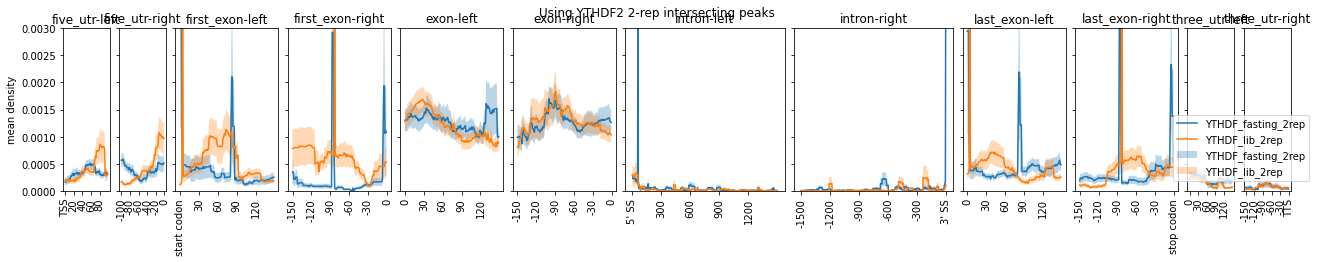

In [19]:
plot_mean_density([ythdf_fast_idr, ythdf_lib_idr], stat = 'mean')
plt.suptitle('Using YTHDF2 2-rep intersecting peaks')

Text(0.5, 0.98, 'Using YTHDF2 2-rep intersecting peaks')

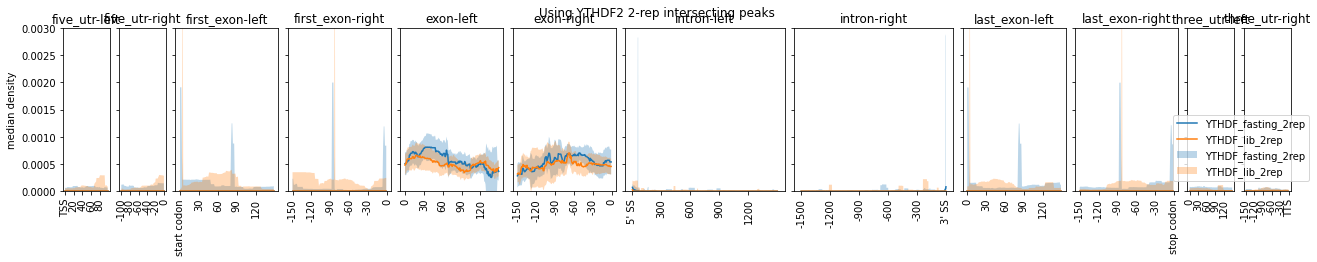

In [20]:
plot_mean_density([ythdf_fast_idr, ythdf_lib_idr], stat = 'median')
plt.suptitle('Using YTHDF2 2-rep intersecting peaks')

# Use m6A AND YTHDF2 peaks (2-rep IDR)

In [30]:
base_dir = '/home/hsher/YTHDF2/intersecting_beds/'
peak = base_dir + 'm6A_fast_2rep_bed6.bed'
t = transcript.intersect(BedTool(peak), s = True, wa = True, u = True).intersect(YTHDF_fast.idr, s = True, u = True).saveas()
ythdf_fast_m6A = Metadensity(YTHDF_fast, t, name = 'YTHDF_fasting_m6A')
ythdf_fast_m6A.get_density_array()

In [31]:

peak = base_dir + 'm6A_lib_2rep_bed6.bed'
t = transcript.intersect(BedTool(peak), s = True, wa = True, u = True).intersect(YTHDF_lib.idr, s = True, u = True).saveas()
ythdf_lib_m6A = Metadensity(YTHDF_lib, t, name = 'YTHDF_lib_m6A')
ythdf_lib_m6A.get_density_array()

Text(0.5, 0.98, 'Using YTHDF2/m6A intersecting peaks')

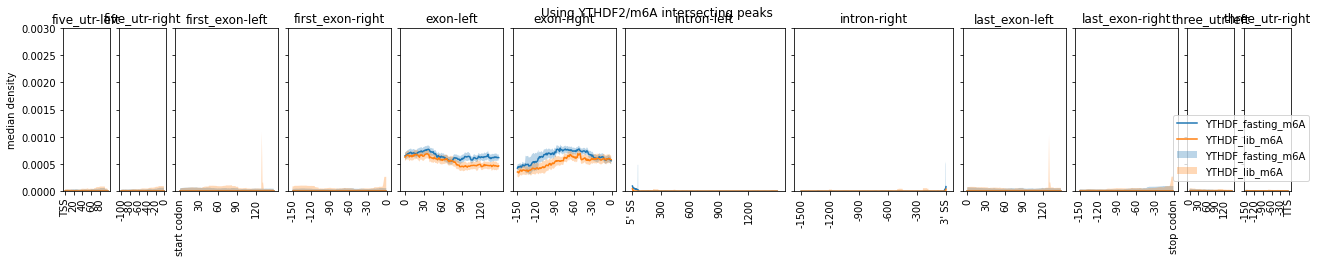

In [32]:
plot_mean_density([ythdf_fast_m6A, ythdf_lib_m6A], stat = 'median')
plt.suptitle('Using YTHDF2/m6A intersecting peaks')

Text(0.5, 0.98, 'Using YTHDF2/m6A intersecting peaks')

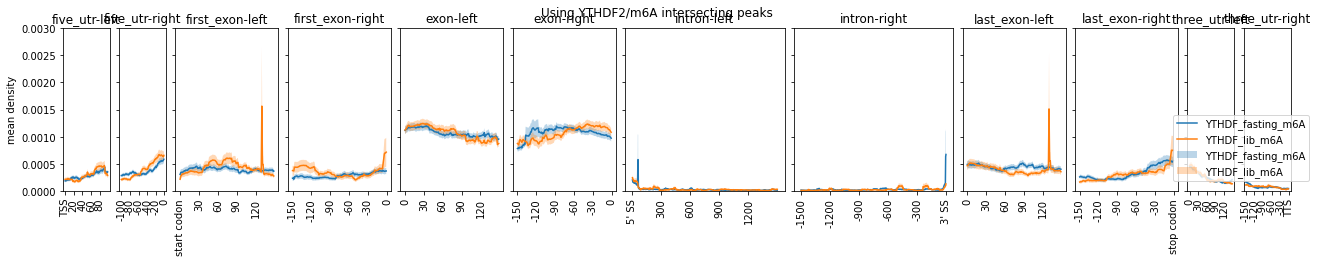

In [33]:
plot_mean_density([ythdf_fast_m6A, ythdf_lib_m6A], stat = 'mean')
plt.suptitle('Using YTHDF2/m6A intersecting peaks')

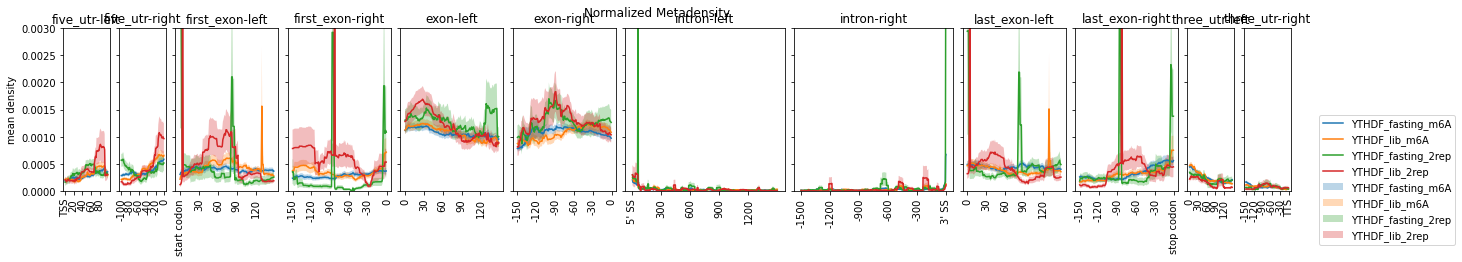

In [34]:
plot_mean_density([ythdf_fast_m6A, ythdf_lib_m6A, ythdf_fast_idr, ythdf_lib_idr], stat = 'mean')

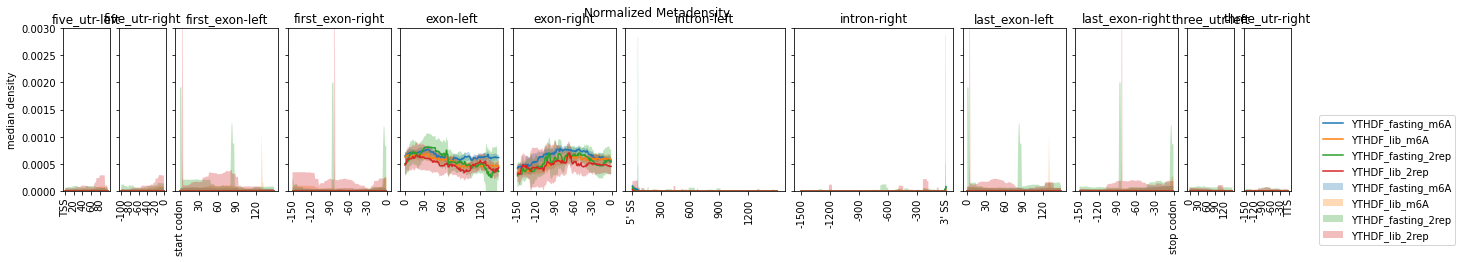

In [35]:
plot_mean_density([ythdf_fast_m6A, ythdf_lib_m6A, ythdf_fast_idr, ythdf_lib_idr], stat = 'median')